In [1]:
! nvidia-smi

Wed Apr 15 16:30:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 複製 darknet

In [2]:
! git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.17 MiB | 4.87 MiB/s, done.
Resolving deltas: 100% (3920/3920), done.


In [3]:
! cd darknet; head Makefile  

GPU=0
CUDNN=0
OPENCV=0
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


## 修改 Makefile
- GPU=1
- CUDNN=1
- OPENCV=1

In [0]:
! sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile

In [6]:
! head /content/darknet/Makefile  

GPU=1
CUDNN=1
OPENCV=1
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


## 編譯 YOLO

In [7]:
! cd darknet; make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN 

## 檢視訓練資料集

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! cp "/content/drive/My Drive/aidataset/medical-masks-dataset.zip" /content/

In [0]:
! unzip /content/medical-masks-dataset.zip > data_unzip.log

In [11]:
! cat /content/labels/012106.jpg_1140x855.xml

<annotation>
	<folder>images</folder>
	<filename>012106.jpg_1140x855.jpg</filename>
	<path>P:\mask_mouth\images\012106.jpg_1140x855.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1140</width>
		<height>855</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>good</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>654</xmin>
			<ymin>275</ymin>
			<xmax>910</xmax>
			<ymax>517</ymax>
		</bndbox>
	</object>
</annotation>


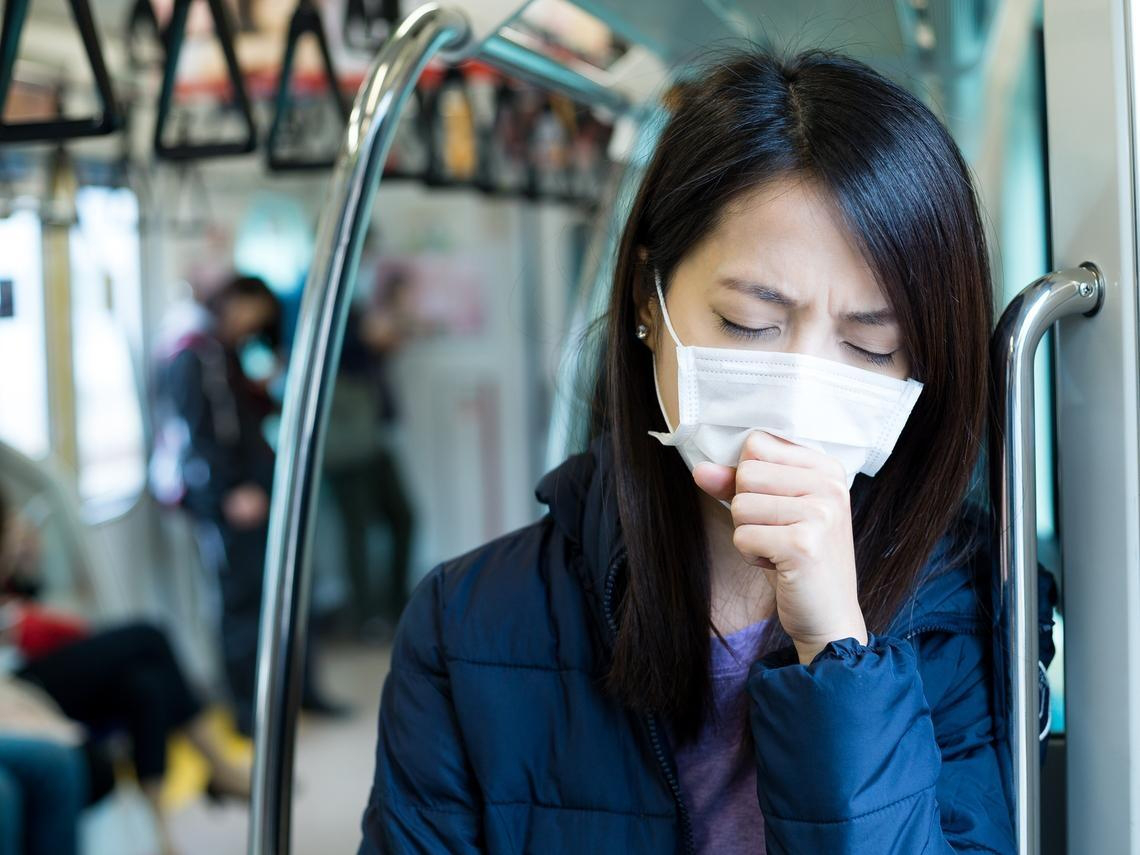

In [12]:
from PIL import Image
img = Image.open('/content/images/012106.jpg_1140x855.jpg')
img

In [13]:
! cat /content/labels/0602623232127-web-tete.xml

<annotation>
	<folder>images</folder>
	<filename>0602623232127-web-tete.jpg</filename>
	<path>P:\mask_mouth\images\0602623232127-web-tete.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1280</width>
		<height>720</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>134</xmin>
			<ymin>84</ymin>
			<xmax>220</xmax>
			<ymax>166</ymax>
		</bndbox>
	</object>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>420</xmin>
			<ymin>16</ymin>
			<xmax>460</xmax>
			<ymax>63</ymax>
		</bndbox>
	</object>
	<object>
		<name>bad</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>610</xmin>
			<ymin>26</ymin>
			<xmax>656</xmax>
			<ymax>77</ymax>
		</bndbox>
	</object>
	<object>
		<name>good</n

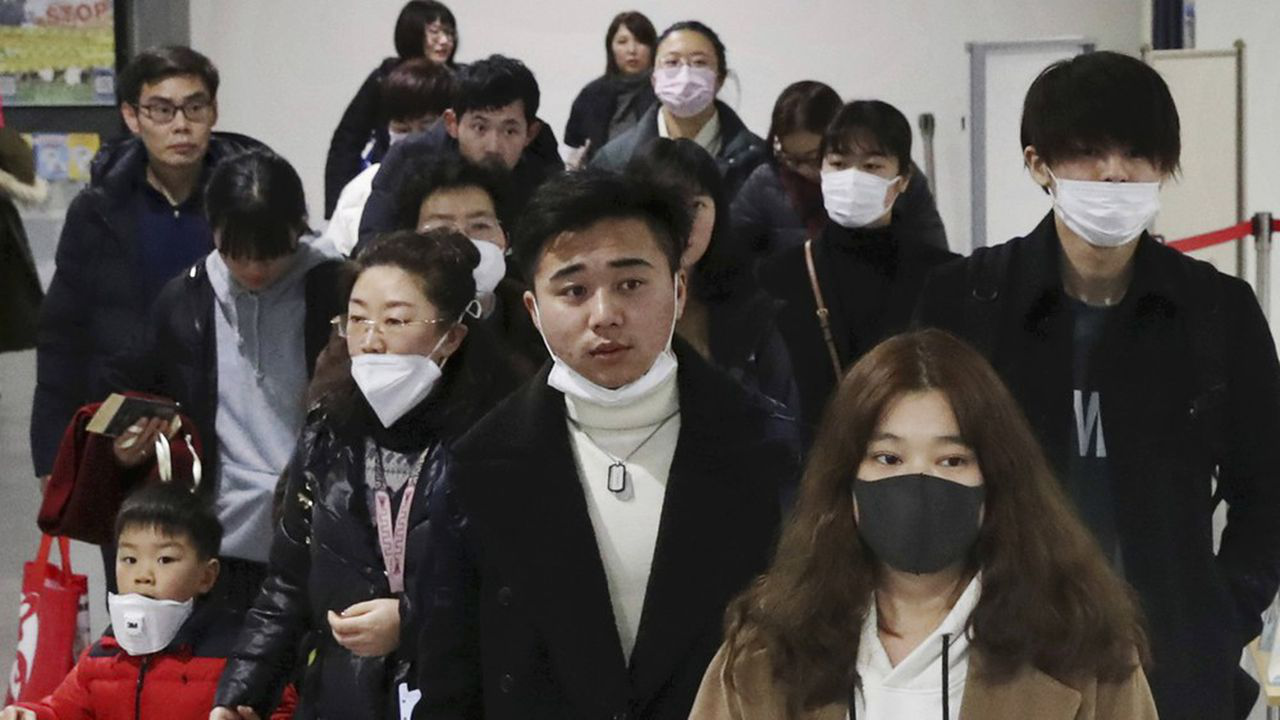

In [14]:
from PIL import Image
img = Image.open('/content/images/0602623232127-web-tete.jpg')
img

In [0]:
! rm -rf /content/yolo
! mkdir /content/yolo

In [0]:
from bs4 import BeautifulSoup
import os
import shutil

status_dic = {'good': 2, 'bad': 1, 'none': 0}
def getYoloFormat(filename,label_path, img_path, yolo_path, newname):
    with open(label_path+ filename, 'r') as f:
        soup = BeautifulSoup(f.read(), 'xml')
        imgname = soup.select_one('filename').text
        image_w = int(soup.select_one('width').text)
        image_h = int(soup.select_one('height').text)
        ary = []
        for obj in soup.select('object'):
            xmin = int(obj.select_one('xmin').text)
            xmax = int(obj.select_one('xmax').text)
            ymin = int(obj.select_one('ymin').text)
            ymax = int(obj.select_one('ymax').text)
            objclass = status_dic.get(obj.select_one('name').text)

            x = (xmin + (xmax-xmin)/2) * 1.0 / image_w
            y = (ymin + (ymax-ymin)/2) * 1.0 / image_h
            w = (xmax-xmin) * 1.0 / image_w
            h = (ymax-ymin) * 1.0 / image_h
            ary.append(' '.join([str(objclass), str(x),str(y),str(w),str(h)]))
        if os.path.exists(img_path + imgname):
            shutil.copyfile(img_path + imgname, yolo_path + newname + '.jpg')
            with open(yolo_path + newname + '.txt', 'w') as f:
                f.write('\n'.join(ary))

In [17]:
import os
labelpath = '/content/labels/'
imgpath   = '/content/images/'
yolopath  = '/content/yolo/'
ary = []
for idx, f in enumerate(os.listdir(labelpath)):
    try:
        getYoloFormat(f, labelpath,imgpath, yolopath, str(idx))
    except Exception as e:
        print(e)

float division by zero


## 準備訓練與測試資料集

In [0]:
! rm -rf /content/cfg_mask
! mkdir /content/cfg_mask

In [19]:
import os
datasets = ['/content/yolo/'+ f for f in os.listdir('/content/yolo/') if not f.endswith('.txt')]
len(datasets) * 0.8

541.6

In [0]:
with open('/content/cfg_mask/train.txt', 'w') as f:
    f.write('\n'.join(datasets[0:540]))

In [0]:
with open('/content/cfg_mask/test.txt', 'w') as f:
    f.write('\n'.join(datasets[540:]))

## 複製參數檔案

In [0]:
! cp "/content/drive/My Drive/aidataset/cfg_mask/obj.data" cfg_mask/
! cp "/content/drive/My Drive/aidataset/cfg_mask/obj.names" cfg_mask/

In [23]:
! head /content/cfg_mask/obj.data

classes= 3
train  = /content/cfg_mask/train.txt
valid  = /content/cfg_mask/test.txt
names  = /content/cfg_mask/obj.names
backup = /content/cfg_mask/weights/

In [24]:
! head /content/cfg_mask/obj.names

none
bad
good


## 建立權重資料夾

In [0]:
! mkdir /content/cfg_mask/weights

## 修改 yolov3-tiny.cfg
- filters=(classes + 5)*3 # 24
- classes=3

In [0]:
! cp /content/darknet/cfg/yolov3-tiny.cfg /content/cfg_mask/  

In [27]:
! sed -n -e 127p -e 135p -e 171p -e 177p /content/cfg_mask/yolov3-tiny.cfg

filters=255
classes=80
filters=255
classes=80


In [0]:
! sed -i '127s/255/24/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '135s/80/3/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '171s/255/24/' /content/cfg_mask/yolov3-tiny.cfg
! sed -i '177s/80/3/' /content/cfg_mask/yolov3-tiny.cfg

In [29]:
! sed -n -e 127p -e 135p -e 171p -e 177p /content/cfg_mask/yolov3-tiny.cfg

filters=24
classes=3
filters=24
classes=3


## 複製權重

In [0]:
#!wget https://pjreddie.com/media/files/darknet53.conv.74
! cp "/content/drive/My Drive/aidataset/darknet53.conv.74" /content/cfg_mask/

## 訓練模型

In [31]:
! darknet/darknet detector train /content/cfg_mask/obj.data /content/cfg_mask/yolov3-tiny.cfg /content/cfg_mask/darknet53.conv.74

yolov3-tiny
layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 5

## 辨識圖片中的人物是否有戴口罩

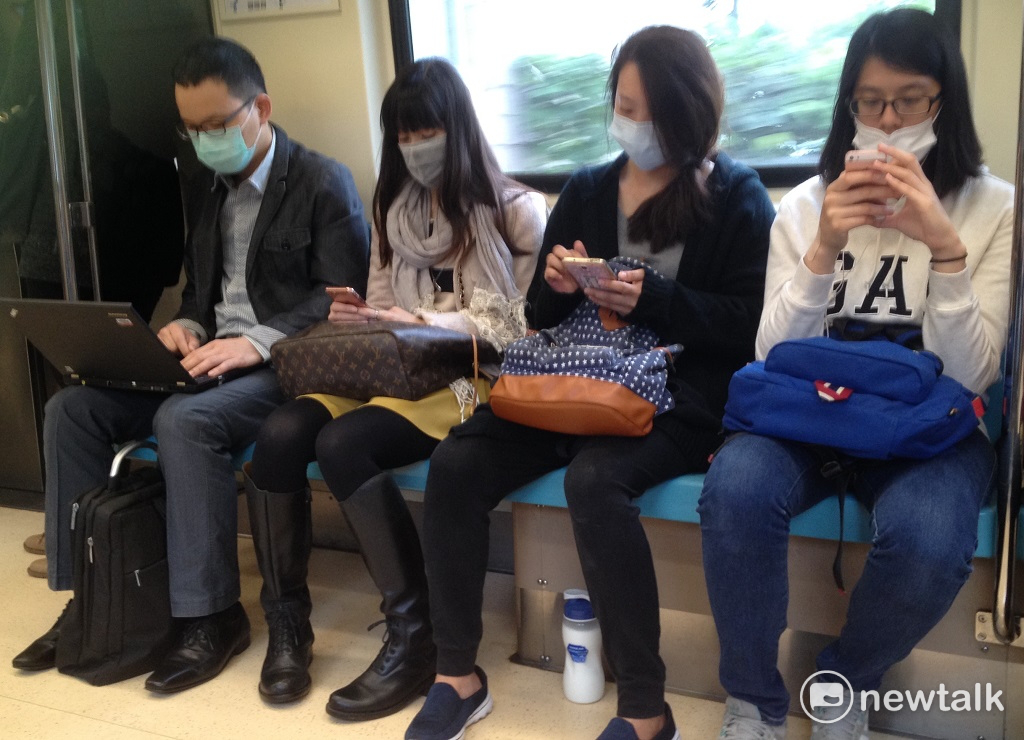

In [32]:
from PIL import Image
Image.open('yolo/703.jpg')

In [0]:
! cp "/content/drive/My Drive/aidataset/weights/yolov3-tiny_250000.weights" /content/cfg_mask/

In [34]:
! cd darknet; ./darknet detector test /content/cfg_mask/obj.data  /content/cfg_mask/yolov3-tiny.cfg /content/cfg_mask/yolov3-tiny_250000.weights /content/yolo/703.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

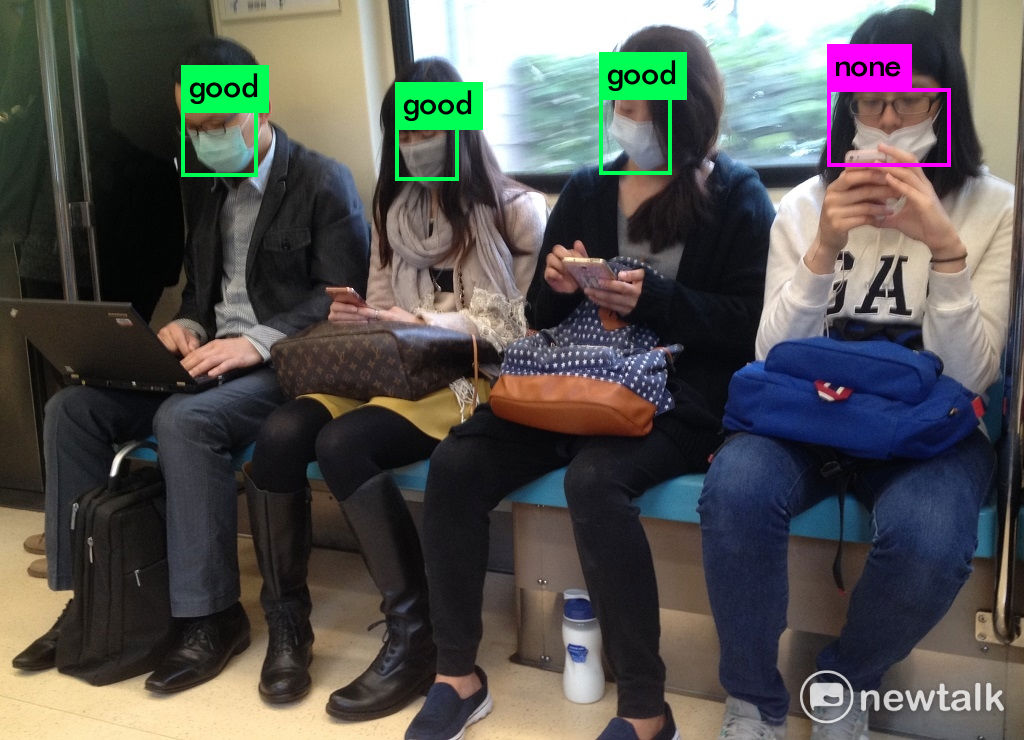

In [35]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')

In [0]:
! cp "/content/drive/My Drive/aidataset/test.jpg" /content/

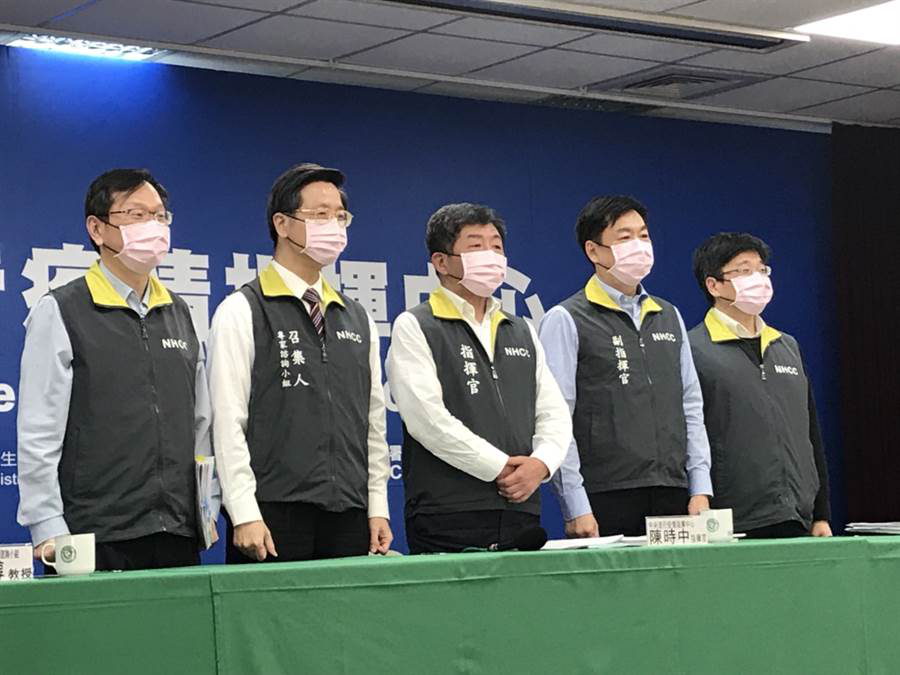

In [38]:
from PIL import Image
Image.open('/content/test.jpg')

In [37]:
! cd darknet; ./darknet detector test /content/cfg_mask/obj.data  /content/cfg_mask/yolov3-tiny.cfg /content/cfg_mask/yolov3-tiny_250000.weights /content/test.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

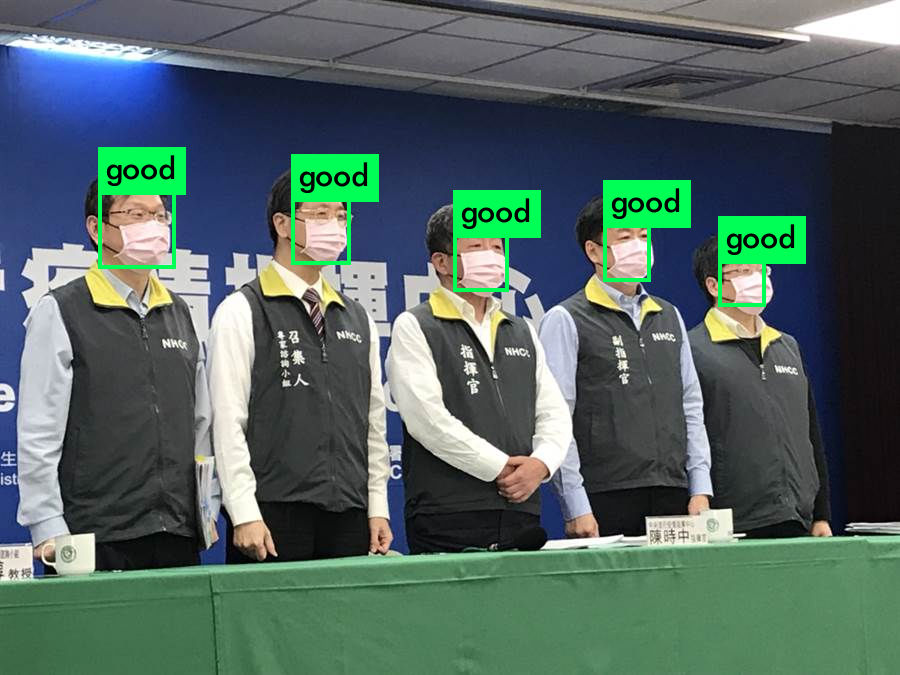

In [39]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')